In [1]:
conda activate tensor


Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np

In [2]:
tf.__version__

'2.4.0'

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [4]:
import matplotlib.pyplot as plt

In [5]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [6]:
X_train.shape,X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [7]:
y_train.shape,y_test.shape

((50000, 1), (10000, 1))

In [8]:
X_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [9]:
X_train=X_train/255.0
X_test=X_test/255.0

In [10]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [11]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
y_test = y_test.reshape(-1,)

In [13]:
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

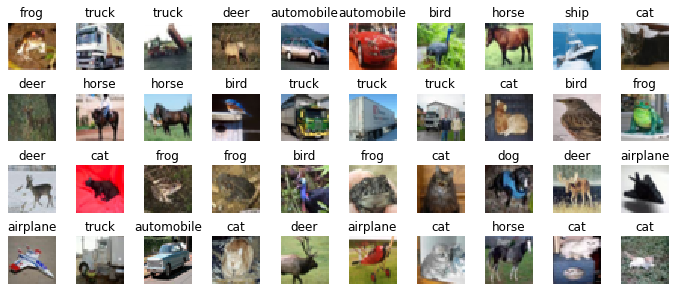

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [14]:
cnn = models.Sequential([
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
cnn.fit(X_train, y_train, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 11s 229us/sample - loss: 1.4210 - accuracy: 0.4905
Epoch 2/10
50000/50000 [==============================] - 7s 137us/sample - loss: 1.0696 - accuracy: 0.6264
Epoch 3/10
50000/50000 [==============================] - 7s 138us/sample - loss: 0.9396 - accuracy: 0.6731
Epoch 4/10
50000/50000 [==============================] - 7s 144us/sample - loss: 0.8535 - accuracy: 0.7041
Epoch 5/10
50000/50000 [==============================] - 7s 136us/sample - loss: 0.7861 - accuracy: 0.7279
Epoch 6/10
50000/50000 [==============================] - 8s 169us/sample - loss: 0.7282 - accuracy: 0.7475
Epoch 7/10
50000/50000 [==============================] - 8s 154us/sample - loss: 0.6745 - accuracy: 0.7625
Epoch 8/10
50000/50000 [==============================] - 7s 141us/sample - loss: 0.6238 - accuracy: 0.7822
Epoch 9/10
50000/50000 [==============================] - 8s 158us/sample - loss: 0.5808 - accuracy: 0.7979
Epoc

In [17]:
cnn.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.9945986963272094, 0.6929]

In [18]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.9247621e-04, 5.8878250e-06, 7.8272820e-03, 3.1655738e-01,
        9.9406019e-04, 6.6209126e-01, 1.1071779e-02, 3.2832013e-05,
        1.1171671e-03, 9.8163600e-06],
       [3.7128231e-04, 1.6876012e-02, 1.4767512e-07, 4.8386532e-08,
        9.5863681e-09, 4.4362548e-11, 4.8143840e-09, 6.4780847e-11,
        9.8249996e-01, 2.5255108e-04],
       [8.1780866e-02, 2.4540161e-01, 6.1911889e-03, 3.0560423e-02,
        2.4904457e-03, 4.5438678e-04, 4.7169081e-03, 7.3732034e-04,
        5.8523506e-01, 4.2431850e-02],
       [9.8389739e-01, 1.6364388e-03, 7.2432793e-04, 3.1984262e-05,
        2.1871515e-04, 1.4582331e-06, 8.7268112e-05, 2.4576248e-06,
        1.2934864e-02, 4.6518032e-04],
       [6.7407786e-06, 2.3922155e-06, 5.1004593e-03, 8.6087910e-03,
        2.9717654e-01, 4.8420709e-03, 6.8426132e-01, 2.0856949e-07,
        1.4085848e-06, 3.1934859e-09]], dtype=float32)

In [19]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 8, 8, 0, 6]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [21]:
X_new=X_test[:3]
y_new=cnn.predict(X_new)
y_new

array([[2.9247659e-04, 5.8878450e-06, 7.8272773e-03, 3.1655779e-01,
        9.9406100e-04, 6.6209090e-01, 1.1071778e-02, 3.2832057e-05,
        1.1171686e-03, 9.8163455e-06],
       [3.7128269e-04, 1.6876061e-02, 1.4767512e-07, 4.8386532e-08,
        9.5863513e-09, 4.4362548e-11, 4.8143840e-09, 6.4780722e-11,
        9.8249996e-01, 2.5255108e-04],
       [8.1780858e-02, 2.4540162e-01, 6.1911880e-03, 3.0560447e-02,
        2.4904432e-03, 4.5438673e-04, 4.7169076e-03, 7.3732022e-04,
        5.8523494e-01, 4.2431865e-02]], dtype=float32)

In [22]:
y_new=[np.argmax(i) for i in y_new]
y_new

[5, 8, 8]

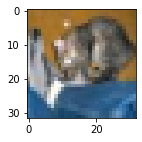

In [23]:
plt.figure(figsize=(5,2))
plt.imshow(X_new[0])

In [24]:
class_names[y_new[0]]

'dog'

In [25]:
class_names[y_test[0]]

'cat'

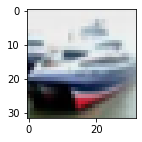

In [26]:
plt.figure(figsize=(5,2))
plt.imshow(X_new[1])

In [27]:
class_names[y_new[1]]

'ship'

In [23]:
from tensorflow_core.python.keras.preprocessing.image import ImageDataGenerator

SymbolAlreadyExposedError: Symbol random_rotation is already exposed as ('keras.preprocessing.image.random_rotation',).

In [15]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [16]:
keras.__version__

'2.4.0'

In [17]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [18]:
from tensorflow import keras

In [19]:
from tensorflow.kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

ModuleNotFoundError: No module named 'tensorflow.kerastuner'

In [20]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

In [21]:
keras.__version__

'2.4.0'

In [22]:
keras.preprocessing

<module 'tensorflow.keras.preprocessing' from 'C:\\Users\\DELL\\anaconda3\\envs\\tensor\\lib\\site-packages\\tensorflow\\keras\\preprocessing\\__init__.py'>

In [38]:
from tensorflow.keras.preprocessing import image as image_utils